In [1]:
using PyPlot

Δt = 0.000001 #time step
t = 0:Δt:0.005;#Define time from 0 
Δω = 2*pi/0.5  # Sample spacing in freq domain in rad/s
N = length(t);
ω = 0:Δω:(N-1)*Δω
A = 2#4Vpp

f0 = 1000
ω0 = 2*pi*f0;   #rad/s

f0 = A*cos.(ω0*t); #Modulating Sine Wave

fc = 20000
ωc = 2*pi*fc;   # rad/s

fc = A*cos.(ωc*t);   #Carrier Sine wave


#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt) #spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 #case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

-499900.0199960009:199.96000799840036:499900.0199960009

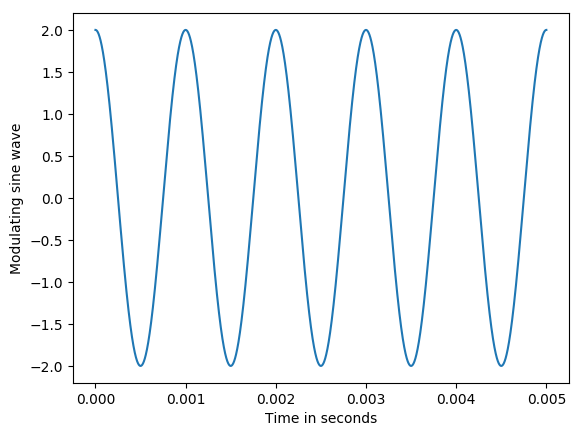

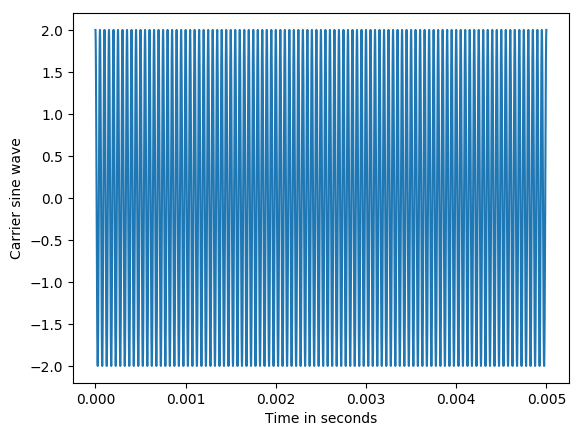

In [2]:
figure()
plot(t,f0,"-")

xlabel("Time in seconds");
ylabel("Modulating sine wave");

figure()
plot(t,fc,"-")

xlabel("Time in seconds");
ylabel("Carrier sine wave");

In [3]:
f0_s = A*sin.(ω0*t)
fc_s = A*sin.(ωc*t);

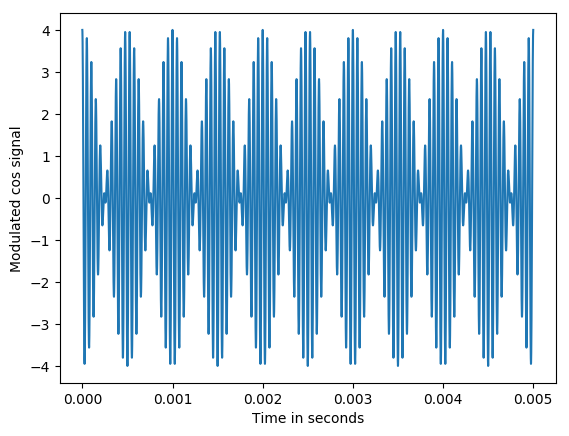

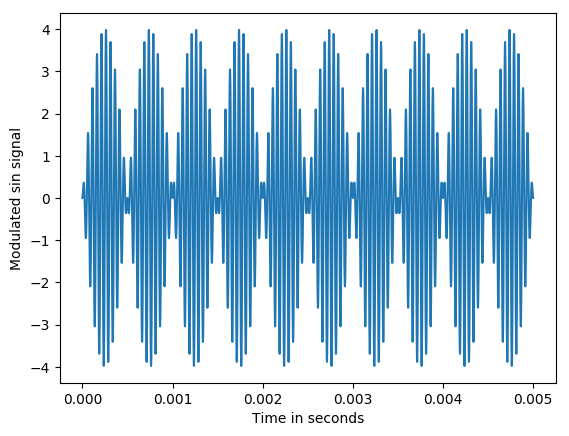

In [4]:
ϕ = f0.*fc
ϕ_s = f0_s.*fc_s

figure()
plot(t,ϕ,"-")

xlabel("Time in seconds");
ylabel("Modulated cos signal");

figure()
plot(t,ϕ_s,"-")

xlabel("Time in seconds");
ylabel("Modulated sin signal");

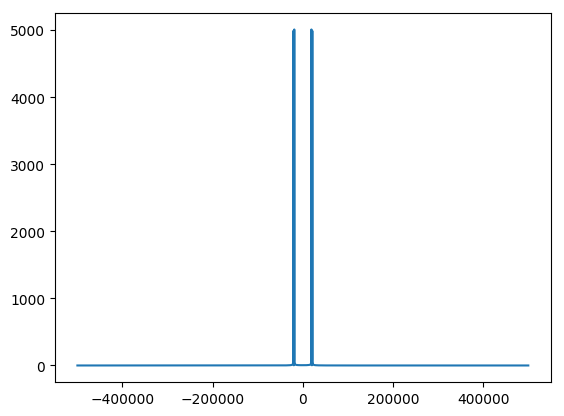

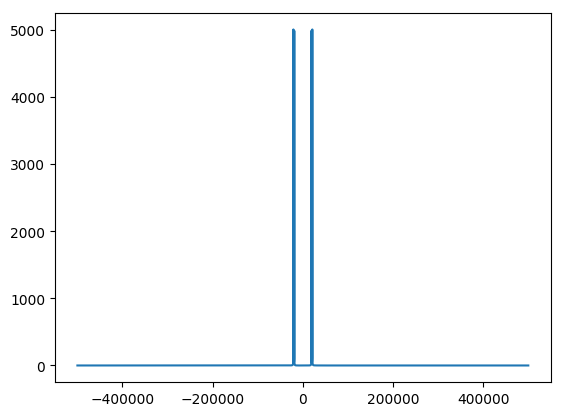

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f894e65bd90>

In [5]:
using FFTW
Φ = fft(ϕ)
Φ_s = fft(ϕ_s)

figure()
plot(f_axis,fftshift(abs.(Φ)),"-")

figure()
plot(f_axis,fftshift(abs.(Φ_s)),"-")


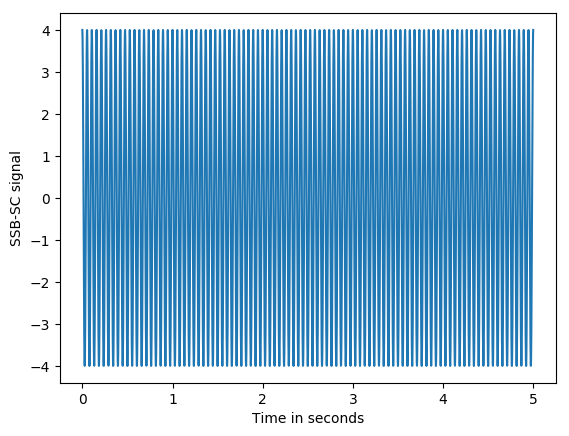

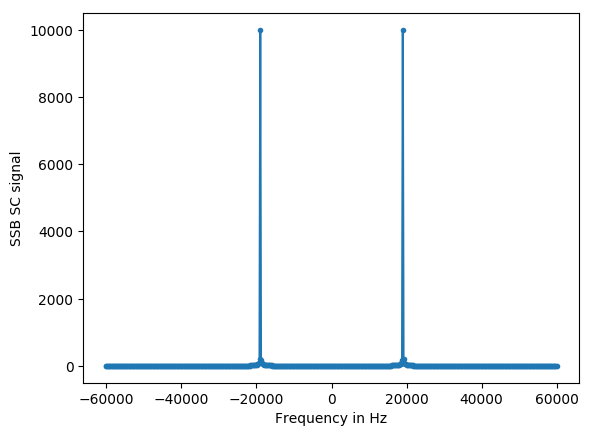

In [11]:
var = 7

ϕssb = (ϕ.+(10/(3+var)).*ϕ_s)

ΦSSB = fft(ϕssb)

figure()
plot(t*1000,ϕssb,"-")
xlabel("Time in seconds");
ylabel("SSB-SC signal");

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(ΦSSB))[2200:end-2200],".-")
xlabel("Frequency in Hz");
ylabel("SSB SC signal");


#Demodulation

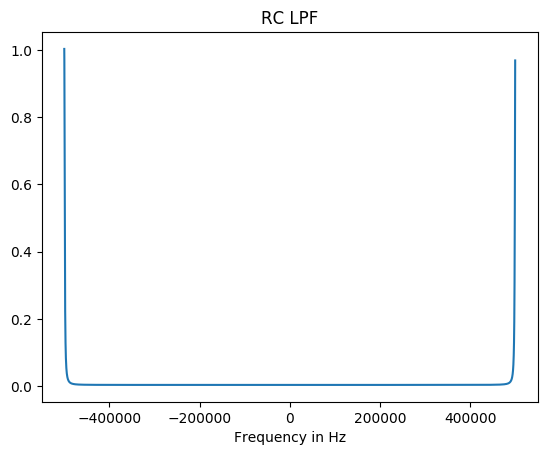

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject Text(0.5,24,'Frequency in Hz')

In [14]:
R = 1e3
C = 150e-9

lpf = 1/(R*C).*exp.(-t/(R*C))*Δt; 

LPF = fft(lpf);

figure()
plot(f_axis,LPF);

title("RC LPF")
xlabel("Frequency in Hz")

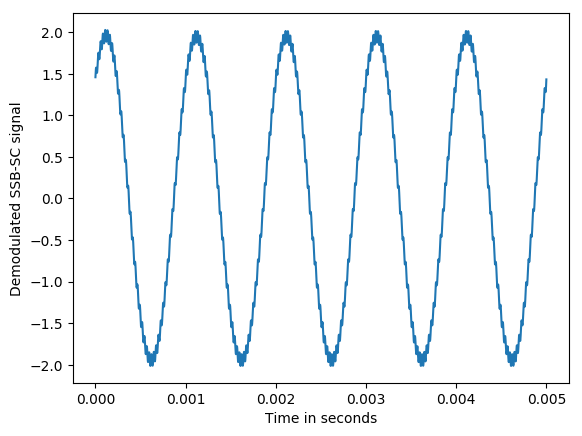

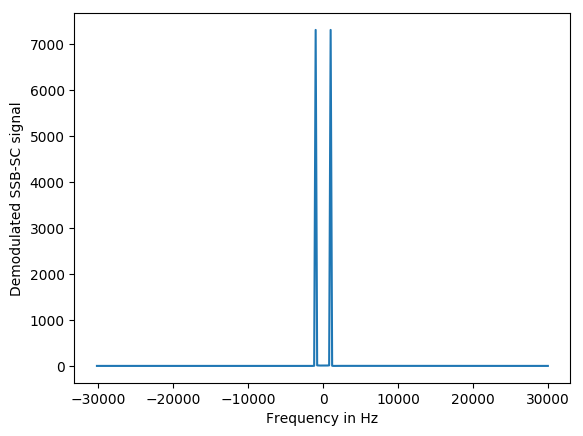

PyObject Text(24,0.5,'Demodulated SSB-SC signal')

In [16]:
dm = ϕssb.*fc

DM = fft(dm)

F = DM.*LPF

f = ifft(F)/1.5

figure()
plot(t,f,"-")
xlabel("Time in seconds");
ylabel("Demodulated SSB-SC signal");

figure()
plot(f_axis[2350:end-2350],fftshift(abs.(F))[2350:end-2350],"-")
xlabel("Frequency in Hz");
ylabel("Demodulated SSB-SC signal")